In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
from collections import Counter
import plotly.graph_objs as go
import plotly.offline as py
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_columns', None)

**Read Data**

In [11]:
data = pd.read_csv('Premier League Scrapy/PL_Table_All_Seasons.csv')
data.shape

(560, 10)

In [12]:
data.head()

Team  Played  Won  Drawn  Lost  Goal_For  Goal_Against  \
0    Manchester United      42   24     12     6        67            31   
1          Aston Villa      42   21     11    10        57            40   
2         Norwich City      42   21      9    12        61            65   
3     Blackburn Rovers      42   20     11    11        68            46   
4  Queens Park Rangers      42   17     12    13        63            55   

   Goal_Deficit  Points  Position  
0            36      84         1  
1            17      74         2  
2            -4      72         3  
3            22      71         4  
4             8      63         5

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Team          560 non-null    object
 1   Played        560 non-null    int64 
 2   Won           560 non-null    int64 
 3   Drawn         560 non-null    int64 
 4   Lost          560 non-null    int64 
 5   Goal_For      560 non-null    int64 
 6   Goal_Against  560 non-null    int64 
 7   Goal_Deficit  560 non-null    int64 
 8   Points        560 non-null    int64 
 9   Position      560 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 43.9+ KB


**Check Null Values**

In [5]:
data.isnull().sum()

Team            0
Played          0
Won             0
Drawn           0
Lost            0
Goal_For        0
Goal_Against    0
Goal_Deficit    0
Points          0
Position        0
dtype: int64

**Data Analysis**

In [6]:
champion = list()
for i in range(len(data)):
    if data.iloc[i]['Position'] == 1:
        champion.append(data.iloc[i]['Team'])
champion_count = Counter(champion)

won = go.Bar(x=list(champion_count.keys()), y=list(champion_count.values()))
layout = go.Layout(title='Number of Premier League Won')
fig = go.Figure(data=[won], layout=layout)
py.iplot(fig)

In [7]:
points_and_positions = np.floor(data.groupby('Position')['Points'].sum()/27)

pts = go.Bar(x=points_and_positions.index, y=points_and_positions.values)
layout = go.Layout(title='Average Points for Each League Position Over 27 Seasons', xaxis=dict(tickvals=data.Position, title='Position'), yaxis_title='Points')
fig = go.Figure(data=[pts], layout=layout)
py.iplot(fig)

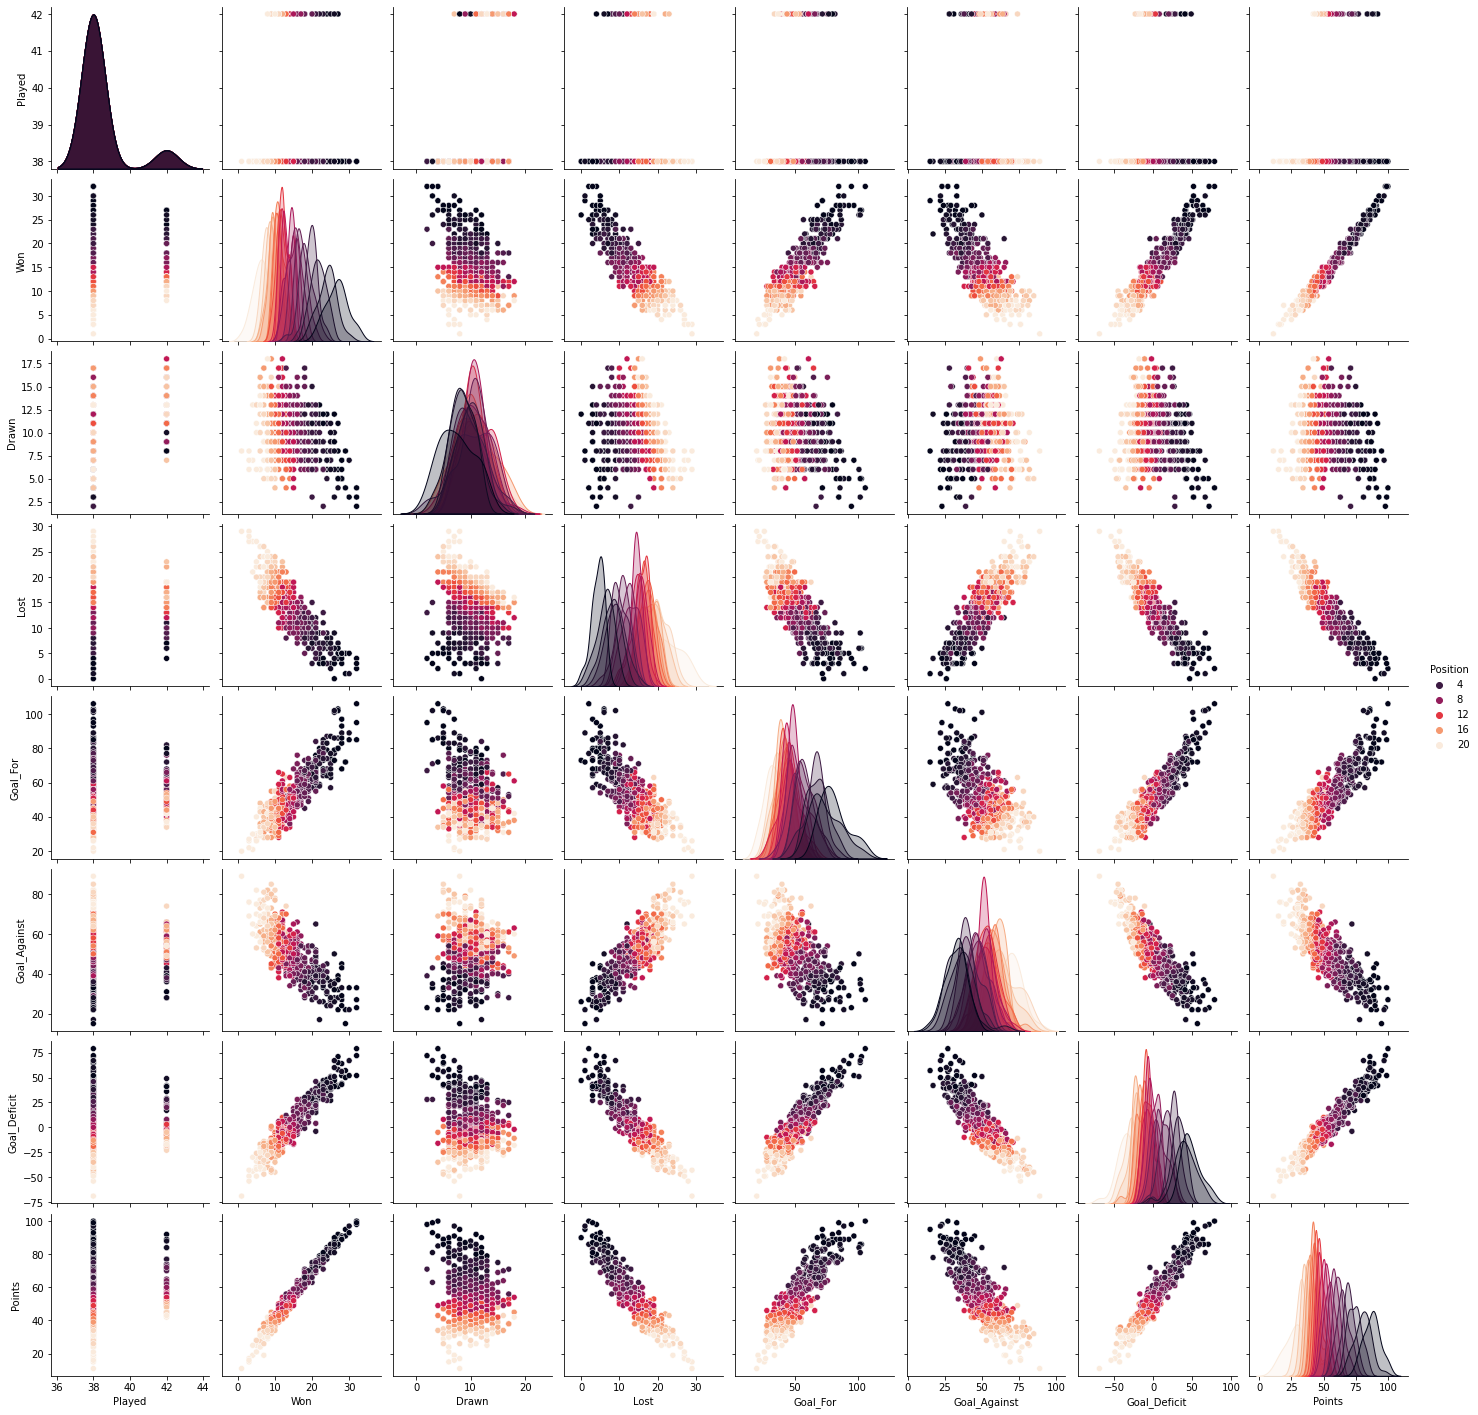

In [8]:
sns.pairplot(data, hue='Position', palette='rocket')

<AxesSubplot:>

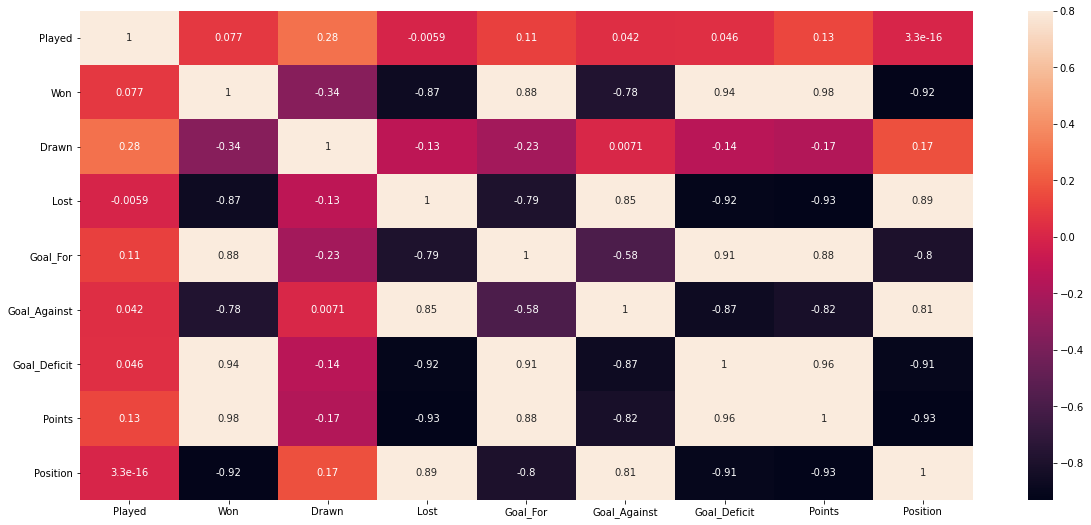

In [9]:
corr = data.corr()
f, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corr, vmax=0.8, annot=True)

**Train and Test Data Split**

In [13]:
data = data.drop('Team', axis=1)
X = data.iloc[:,:-1]
y = data.Position

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
X_train.shape, X_test.shape

((504, 8), (56, 8))

**Model Instantiation, Fitting, and Prediction**

In [17]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
train_pred = LinReg.predict(X_test)
pred = list()
for i in train_pred:
    pred.append(math.ceil(i))

**Model Diagnostic**

In [18]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = metrics.r2_score(true, predicted)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2 Square: ', r2_square)

evaluate(y_test.values, pred)

MAE:  1.6785714285714286
MSE:  4.607142857142857
RMSE:  2.1464256001881026
R2 Square:  0.8531468531468531


In [19]:
pred_result = go.Scatter(x=y_test, y=pred, mode='markers')
layout = go.Layout(title='Prediction Result', xaxis=dict(tickvals=data.Position,title='Predicted Position'), yaxis_title='Predicted Position')
fig = go.Figure(data=[pred_result], layout=layout)
py.iplot(fig)

In [20]:
pred_result = go.Scatter(x=pred, y=(y_test-pred), mode='markers')
layout = go.Layout(title='Prediction Residuals', xaxis=dict(tickvals=data.Position,title='Predicted Position'), yaxis_title='Residual')
fig = go.Figure(data=[pred_result], layout=layout)
py.iplot(fig)

In [21]:
pickle.dump(LinReg, open('model.pkl','wb'))

In [22]:
model = pickle.load(open('model.pkl', 'rb'))
print(math.ceil(model.predict([[42,24,12,6,67,31,36,84]])))

2
